In [1]:
# veri seti dosya yolu
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/student-mat.csv
/kaggle/input/student-por.csv


In [2]:
# veri ve çizim kütüphaneleri
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [3]:
df0 = pd.read_csv("/kaggle/input/student-mat.csv", sep=';')
df1 = pd.read_csv("/kaggle/input/student-por.csv", sep=';')
df = pd.concat([df0, df1])

# **Görselleştirme**

# **Veri Ön İşleme**

In [4]:
# kategorik veriler 
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [5]:
#kategorik verilerin değerleri
for i in categorical_cols:
    print(df[i].unique())
print()

['GP' 'MS']
['F' 'M']
['U' 'R']
['GT3' 'LE3']
['A' 'T']
['at_home' 'health' 'other' 'services' 'teacher']
['teacher' 'other' 'services' 'health' 'at_home']
['course' 'other' 'home' 'reputation']
['mother' 'father' 'other']
['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['no' 'yes']
['no' 'yes']



In [6]:
# eksik veri kontrolü
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
# school'un bilgileri
labels = df['school'].value_counts().index
labels

Index(['GP', 'MS'], dtype='object', name='school')

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

['GP' 'MS']
['F' 'M']
['U' 'R']
['GT3' 'LE3']
['A' 'T']
['at_home' 'health' 'other' 'services' 'teacher']
['teacher' 'other' 'services' 'health' 'at_home']
['course' 'other' 'home' 'reputation']
['mother' 'father' 'other']
['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['no' 'yes']
['no' 'yes']



# **Veri Setini Numerik Veri Setine Dönüştürme - 1**

In [8]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [9]:
sex = {
    'F':0,
    'M':1
}
address = {
    'U':1,
    'R':0
}
famsize = {
    'GT3':1,
    'LE3':0
}
Pstatus = {
    'T':1,
    'A':0
}
Mjob = {
    'teacher':4,
    'at_home':3,
    'other':2,
    'services':1,
    'health':0
}
Fjob = {
    'teacher':4,
    'at_home':3,
    'other':2,
    'services':1,
    'health':0
}

reason = {
    'home':0,
    'other':1,
    'course':2,
    'reputation':3
    }
guardian = {
    'other':0,
    'father':1,
    'mother':2
}
df['sex']=df['sex'].map(sex)
df['address']=df['address'].map(address)
df['famsize']=df['famsize'].map(famsize)
df['Pstatus']=df['Pstatus'].map(Pstatus)
df['Mjob']=df['Mjob'].map(Mjob)
df['Fjob']=df['Fjob'].map(Fjob)
df['reason']=df['reason'].map(reason)
df['guardian']=df['guardian'].map(guardian)

In [10]:
df = pd.get_dummies(df, drop_first=True)

In [11]:
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,G3,school_MS,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,0,18,1,1,0,4,4,3,4,2,...,6,False,True,False,False,False,True,True,False,False
1,0,17,1,1,1,1,1,3,2,2,...,6,False,False,True,False,False,False,True,True,False
2,0,15,1,0,1,1,1,3,2,1,...,10,False,True,False,True,False,True,True,True,False
3,0,15,1,1,1,4,2,0,1,0,...,15,False,False,True,True,True,True,True,True,True
4,0,16,1,1,1,3,3,2,2,0,...,10,False,False,True,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,19,0,1,1,2,3,1,2,2,...,10,True,False,False,False,True,False,True,True,False
645,0,18,1,0,1,3,1,4,1,2,...,16,True,False,True,False,False,True,True,True,False
646,0,18,1,1,1,1,1,2,2,2,...,9,True,False,False,False,True,True,True,False,False
647,1,17,1,0,1,3,1,1,1,2,...,10,True,False,False,False,False,False,True,True,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sex             1044 non-null   int64
 1   age             1044 non-null   int64
 2   address         1044 non-null   int64
 3   famsize         1044 non-null   int64
 4   Pstatus         1044 non-null   int64
 5   Medu            1044 non-null   int64
 6   Fedu            1044 non-null   int64
 7   Mjob            1044 non-null   int64
 8   Fjob            1044 non-null   int64
 9   reason          1044 non-null   int64
 10  guardian        1044 non-null   int64
 11  traveltime      1044 non-null   int64
 12  studytime       1044 non-null   int64
 13  failures        1044 non-null   int64
 14  famrel          1044 non-null   int64
 15  freetime        1044 non-null   int64
 16  goout           1044 non-null   int64
 17  Dalc            1044 non-null   int64
 18  Walc            1044 non-null   in

# Gereksiz sütunları kaldırma

In [13]:
# por
#df = df.drop(columns=['Pstatus', 'guardian', 'Mjob', 'nursery_yes', 'famrel', 'famsize'])
#df = df.drop(columns=['Pstatus', 'guardian', 'Mjob', 'nursery_yes', 'famrel', 'famsize', 'paid_yes', 'famsup_yes', 'activities_yes', 'reason', 'Fjob'])
#df = df.drop(columns=['Pstatus', 'guardian', 'Mjob', 'nursery_yes', 'famrel', 'famsize', 'paid_yes', 'famsup_yes', 'activities_yes', 'reason', 'Fjob', 'schoolsup_yes', 'absences', 'romantic_yes'])
#df = df.drop(columns=['Pstatus', 'guardian', 'Mjob', 'nursery_yes', 'famrel', 'famsize', 'paid_yes', 'famsup_yes', 'activities_yes', 'reason', 'Fjob', 'schoolsup_yes', 'absences', 'romantic_yes', 'goout', 'health'])

# mat
#df = df.drop(columns=['activities_yes', 'freetime', 'absences', 'reason', 'famsup_yes', 'nursery_yes', 'famrel', 'guardian', 'school_MS', 'Dalc', 'Walc'])
#df = df.drop(columns=['activities_yes', 'freetime', 'absences', 'reason'])
#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel']) 

In [14]:
#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel', 'Pstatus', 'guardian', 'Mjob', 'Fjob', 'famsize', 'paid_yes']) 
#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel', 'famsup_yes', 'schoolsup_yes', 'romantic_yes', 'goout', 'health']) 
#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel', 'famsize', 'paid_yes', 'famsup_yes', 'schoolsup_yes']) 
#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel', 'Pstatus', 'guardian', 'Mjob', 'Fjob', 'famsize', 'paid_yes', 'famsup_yes', 'schoolsup_yes']) 

In [15]:
#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel', 'romantic_yes', 'goout', 'health']) # 3 lü deneme
#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel', 'goout', 'health'])
#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel', 'romantic_yes', 'health'])

#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel', 'romantic_yes', 'goout'])
#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel', 'goout'])
#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel', 'romantic_yes'])

In [16]:
#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel', 'romantic_yes', 'goout'])
#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel', 'romantic_yes', 'goout', 'Pstatus'])
#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel', 'romantic_yes', 'goout', 'Pstatus', 'guardian'])
#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel', 'romantic_yes', 'goout', 'Pstatus', 'guardian', 'Mjob', 'Fjob'])
#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel', 'romantic_yes', 'goout', 'Pstatus', 'guardian', 'Mjob', 'Fjob', 'famsize']) #*********
#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel', 'romantic_yes', 'goout', 'Pstatus', 'guardian', 'Mjob', 'Fjob', 'famsize', 'paid_yes'])
#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel', 'romantic_yes', 'goout', 'Pstatus', 'guardian', 'Mjob', 'Fjob', 'famsize', 'famsup_yes'])
#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel', 'romantic_yes', 'goout', 'Pstatus', 'guardian', 'Mjob', 'Fjob', 'famsize', 'schoolsup_yes'])
#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel', 'romantic_yes', 'goout', 'Pstatus', 'guardian', 'Mjob', 'Fjob', 'famsize', 'freetime'])

In [17]:
### por -> mat
#df = df.drop(columns=['Pstatus', 'guardian', 'Mjob', 'nursery_yes', 'famrel', 'famsize', 'paid_yes', 'famsup_yes', 'activities_yes', 'reason', 'Fjob', 'schoolsup_yes', 'absences', 'romantic_yes', 'goout', 'health'])
#df = df.drop(columns=['Pstatus', 'guardian', 'Mjob', 'nursery_yes', 'famrel', 'famsize', 'paid_yes', 'famsup_yes', 'activities_yes', 'reason', 'Fjob', 'schoolsup_yes', 'absences', 'romantic_yes', 'goout', 'health', 'freetime'])

In [18]:
#df = df.drop(columns=['Pstatus', 'guardian', 'Mjob', 'nursery_yes', 'famrel', 'famsize', 'paid_yes', 'famsup_yes', 'school_MS', 'Dalc', 'internet_yes'])
#df = df.drop(columns=['activities_yes', 'reason', 'Fjob', 'schoolsup_yes', 'absences', 'romantic_yes', 'goout', 'health', 'freetime'])

In [19]:
#df = df.drop(columns=['Pstatus', 'guardian', 'Mjob', 'nursery_yes', 'famrel', 'famsize', 'paid_yes', 'famsup_yes', 'school_MS', 'Dalc', 'internet_yes'])
#df = df.drop(columns=['activities_yes', 'reason', 'Fjob', 'schoolsup_yes', 'romantic_yes', 'goout', 'health', 'freetime'])

In [20]:
#df = df.drop(columns=['Pstatus', 'guardian', 'Mjob', 'nursery_yes', 'famrel', 'famsize', 'paid_yes', 'famsup_yes', 'school_MS', 'Dalc', 'internet_yes'])
#df = df.drop(columns=['activities_yes', 'reason', 'Fjob', 'schoolsup_yes', 'romantic_yes', 'goout', 'health', 'freetime', 'higher_yes'])

In [21]:
def clean_df(df):
    df = df.drop(columns=['Pstatus', 'guardian', 'Mjob', 'nursery_yes', 'famrel', 'famsize', 'paid_yes', 'famsup_yes', 'school_MS', 'Dalc', 'internet_yes'])
    df = df.drop(columns=['sex', 'activities_yes', 'reason', 'Fjob', 'schoolsup_yes', 'romantic_yes', 'goout', 'freetime', 'higher_yes', 'health','goout'])

    return df
    

In [22]:
#df = df.drop(columns=['', '', 'Mjob', '', 'famrel', '', '', '', '', '', ''])
#df = df.drop(columns=['', 'reason', 'Fjob', '', 'absences', '', 'goout', 'health', 'freetime'])

### **Numerik veri setine dönüştürme - yol 2**

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
# Tüm kategorik sütunları bul
categorical_columns = df.select_dtypes(include=['object']).columns

# LabelEncoder'ı kullanarak tüm kategorik sütunları dönüştürme
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col, le in label_encoders.items():
    df[col] = le.fit_transform(df[col])

## Veri Setini Ayırma ve Gereksiz Değer analizi

In [23]:
df = clean_df(df)
print(df)
x = df.drop('G3', axis=1).values
y = df['G3'].values

     age  address  Medu  Fedu  traveltime  studytime  failures  Walc  \
0     18        1     4     4           2          2         0     1   
1     17        1     1     1           1          2         0     1   
2     15        1     1     1           1          2         3     3   
3     15        1     4     2           1          3         0     1   
4     16        1     3     3           1          2         0     2   
..   ...      ...   ...   ...         ...        ...       ...   ...   
644   19        0     2     3           1          3         1     2   
645   18        1     3     1           1          2         0     1   
646   18        1     1     1           2          2         0     1   
647   17        1     3     1           2          1         0     4   
648   18        0     3     2           3          1         0     4   

     absences  G1  G2  G3  
0           6   5   6   6  
1           4   5   5   6  
2          10   7   8  10  
3           2  15  14  

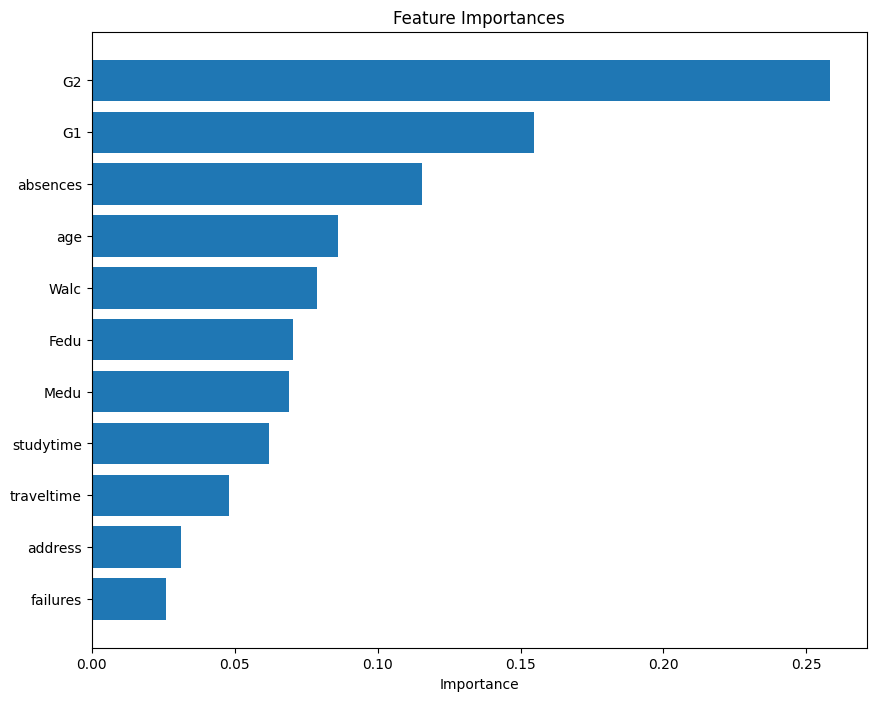

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=42)

from sklearn.ensemble import RandomForestClassifier

x = df.drop('G3', axis=1)
y = df['G3']

modelTest = RandomForestClassifier(n_estimators=100, random_state=42)
modelTest.fit(x, y)

importances = modelTest.feature_importances_
features = x.columns

indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importance")
plt.show()

In [25]:
# Özellik önemlerini ve isimlerini birleştirin
feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
})

# Önem sırasına göre sıralayın
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Belirli bir eşik değerinin altındaki önemlere sahip özellikleri seçin
threshold = 0.03
less_important_features = feature_importance_df[feature_importance_df['importance'] < threshold]

print("G3 sınıfına etki etmeyen özellikler:")
print(less_important_features)

G3 sınıfına etki etmeyen özellikler:
    feature  importance
6  failures    0.026081


In [26]:
# uğraştırmadan column silme
# df = df.drop(columns=less_important_features['feature'], axis=1)

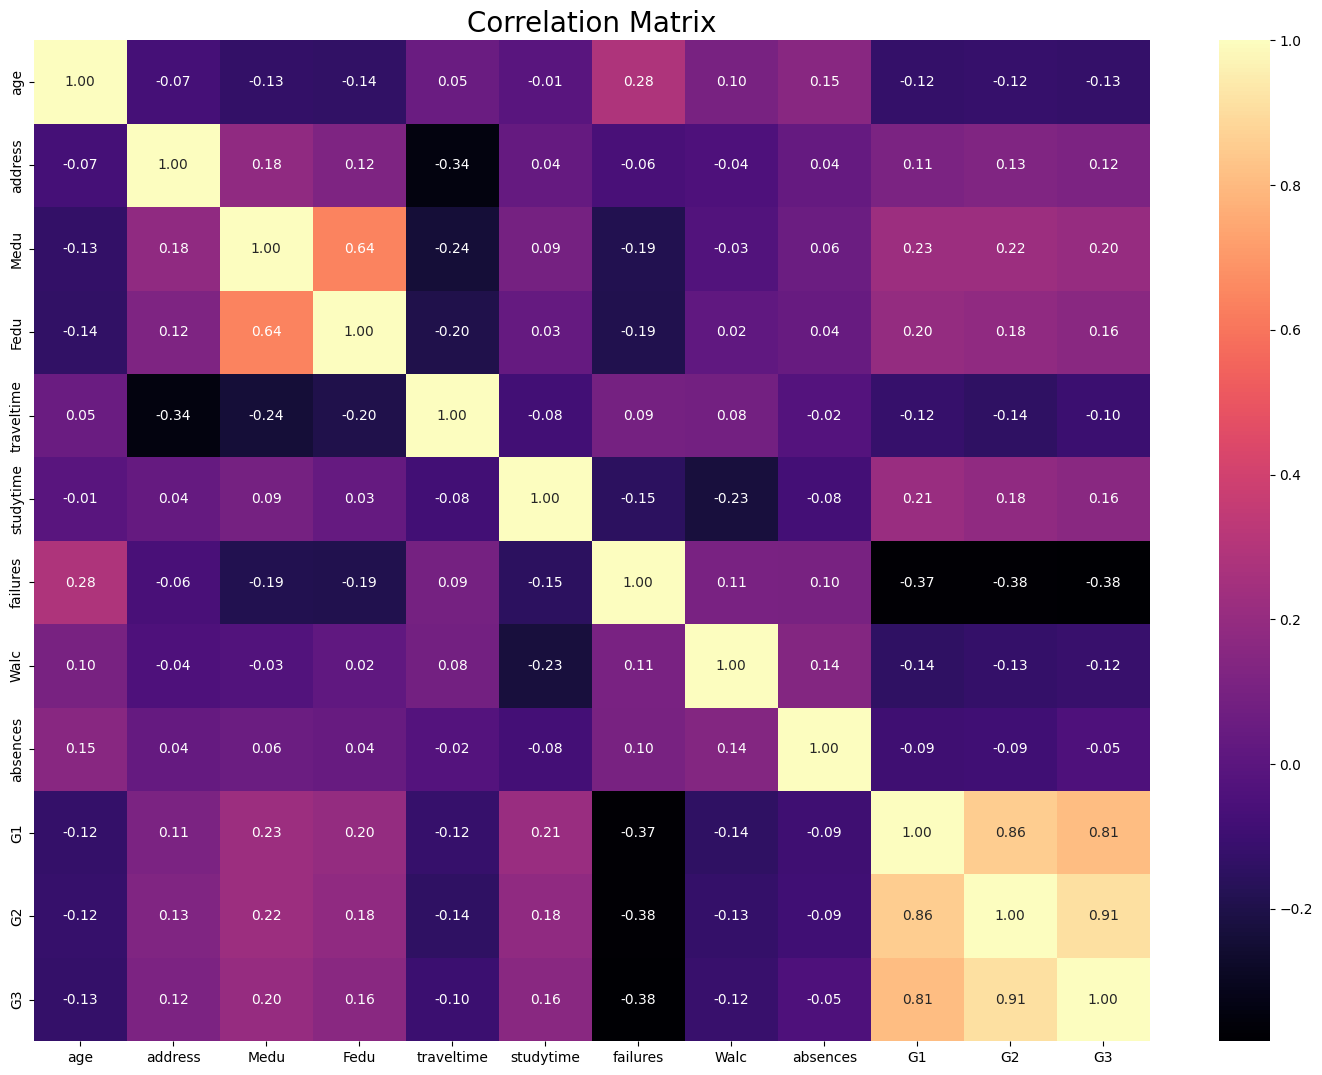

In [27]:
#Korelasyon ilişkisinin heatmap ile gösterilmesi

# Özellikler arasındaki korelasyon ilişkisinin heatmap ile incelenmesi 
# -1 negatif doğrusal ilişki , 1 pozitif doğrusal ilişki, 0 doğrusal ilişki yok
import seaborn as sns 

f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [28]:
# por
#df = df.drop(columns=['Pstatus', 'guardian', 'Mjob', 'nursery_yes', 'famrel', 'famsize'])
#df = df.drop(columns=['Pstatus', 'guardian', 'Mjob', 'nursery_yes', 'famrel', 'famsize', 'paid_yes', 'famsup_yes', 'activities_yes', 'reason', 'Fjob'])
#df = df.drop(columns=['Pstatus', 'guardian', 'Mjob', 'nursery_yes', 'famrel', 'famsize', 'paid_yes', 'famsup_yes', 'activities_yes', 'reason', 'Fjob', 'schoolsup_yes', 'absences', 'romantic_yes'])
#df = df.drop(columns=['Pstatus', 'guardian', 'Mjob', 'nursery_yes', 'famrel', 'famsize', 'paid_yes', 'famsup_yes', 'activities_yes', 'reason', 'Fjob', 'schoolsup_yes', 'absences', 'romantic_yes', 'goout', 'health'])

#diffs=['Pstatus', 'guardian', 'Mjob', 'Fjob', 'famsize', 'paid_yes', 'famsup_yes', 'schoolsup_yes', 'romantic_yes', 'goout', 'health']
#sames=['nursery_yes', 'activities_yes', 'absences', 'famrel', 'reason']

# mat
#df = df.drop(columns=['activities_yes', 'freetime', 'absences', 'reason'])
#df = df.drop(columns=['activities_yes', 'freetime', 'absences', 'reason', 'famsup_yes', 'nursery_yes', 'famrel', 'guardian', 'school_MS', 'Dalc', 'Walc'])
#df = df.drop(columns=['activities_yes', 'absences', 'reason', 'nursery_yes', 'famrel'])
#df = df.drop(columns=['Pstatus', 'guardian', 'Mjob', 'nursery_yes', 'famrel', 'famsize', 'paid_yes', 'famsup_yes', 'activities_yes', 'reason', 'Fjob', 'schoolsup_yes', 'absences', 'romantic_yes', 'goout', 'health'])
#df = df.drop(columns=['Pstatus', 'guardian', 'Mjob', 'nursery_yes', 'famrel', 'famsize', 'paid_yes', 'famsup_yes', 'activities_yes', 'reason', 'Fjob', 'schoolsup_yes', 'absences', 'romantic_yes', 'goout', 'health', 'freetime'])


# **Random Forest Regressor**

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model_random_forest_regressor = RandomForestRegressor()
model_random_forest_regressor.fit(x_train, y_train)
predictions_random_forest_regressor = model_random_forest_regressor.predict(x_test)

rf_score=model_random_forest_regressor.score(x_test, y_test)
rf_r2score=r2_score(predictions_random_forest_regressor, y_test)

print("Random Forest Regressor: ")
print("r2 score: ", rf_r2score)
print("score: ", rf_score)

Random Forest Regressor: 
r2 score:  0.8155360968027756
score:  0.8339272735407947


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model_random_forest_regressorN = RandomForestRegressor()
model_random_forest_regressorN.fit(x_train_scaled, y_train)
predictions_random_forest_regressorN = model_random_forest_regressorN.predict(x_test_scaled)

rfN_score=model_random_forest_regressorN.score(x_test_scaled, y_test)
rfN_r2score=r2_score(predictions_random_forest_regressorN, y_test)

print("Random Forest Regressor (N+): ")
print("r2 score: ", rfN_r2score)
print("score: ", rfN_score)

Random Forest Regressor (N+): 
r2 score:  0.8138809821225457
score:  0.8299310454480806


# **Decision Tree Regressor**

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x.values,y.values,train_size=0.60,random_state=42)
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor()
model_tree.fit(x_train, y_train)
predict_tree = model_tree.predict(x_test)

dt_score=model_tree.score(x_test, y_test)
dt_r2score=r2_score(predict_tree, y_test)

print("Decision Tree Regressor: ")
print("r2 score: ", dt_r2score)
print("score: ", dt_score)

Decision Tree Regressor: 
r2 score:  0.6393030005593727
score:  0.6769394872198198


In [32]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model_treeN = DecisionTreeRegressor()
model_treeN.fit(x_train_scaled, y_train)
predictions_treeN = model_treeN.predict(x_test_scaled)

dtN_score=model_treeN.score(x_test_scaled, y_test)
dtN_r2score= r2_score(predictions_treeN, y_test)

print("Decision Tree Regressor (N+): ")
print("r2 score: ", dtN_r2score)
print("score: ", dtN_score)

Decision Tree Regressor (N+): 
r2 score:  0.6795061684668425
score:  0.6989088665135795


# **KNN (En Yakın Komşu):**

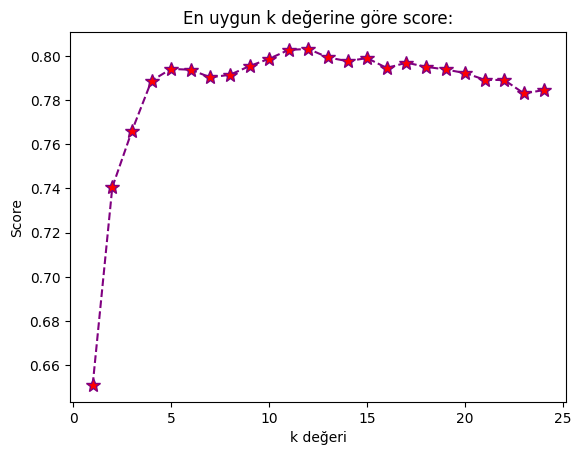

In [33]:
from sklearn.neighbors import KNeighborsRegressor

score_list = []
for each in range(1,25):
    knn1 = KNeighborsRegressor(n_neighbors=each)
    knn1.fit(x_train,y_train)
    score_list.append(knn1.score(x_test,y_test))
    
plt.title("En uygun k değerine göre score:")
plt.plot(range(1,25),score_list, color = 'purple', linestyle = 'dashed', marker = '*', markerfacecolor = 'red', markersize = 10)
plt.xlabel("k değeri")
plt.ylabel("Score")
plt.show()

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=6)

knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(x_train,y_train)
predict_knn = knn.predict(x_test)

knn_score=knn.score(x_test, y_test)
knn_r2score= r2_score(predict_knn, y_test)

print("KNN Regressor: ")
print("r2 score: ", knn_r2score)
print("score: ", knn_score)

KNN Regressor: 
r2 score:  0.8432086813099944
score:  0.8627038914377201


In [35]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

knnN = KNeighborsRegressor(n_neighbors=3)
knnN.fit(x_train_scaled,y_train)
predict_knnN = knnN.predict(x_test_scaled)

knnN_score=knnN.score(x_test_scaled, y_test)
knnN_r2score= r2_score(predict_knnN, y_test)

print("KNN Regressor (N+): ")
print("r2 score: ", knnN_r2score)
print("score: ", knnN_score)

KNN Regressor (N+): 
r2 score:  0.33599575388103053
score:  0.6076777188779132


# **Naive Bayes:**

In [36]:
from sklearn.naive_bayes import GaussianNB

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=42)

nb = GaussianNB()
nb.fit(x_train, y_train)
predict_nb = nb.predict(x_test)

nb_score=nb.score(x_test, y_test)
nb_r2score= r2_score(predict_nb, y_test)

print("Gaussian Naive Bayes: ")
print("r2 score: ", nb_r2score)
print("score: ", nb_score)

Gaussian Naive Bayes: 
r2 score:  0.4513251653252679
score:  0.3157894736842105


In [37]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

nbN=GaussianNB()
nbN.fit(x_train_scaled,y_train)
predict_nbN = nbN.predict(x_test_scaled)

nbN_score=nbN.score(x_test_scaled, y_test)
nbN_r2score= r2_score(predict_nbN, y_test)

print("Gaussian Naive Bayes (N+): ")
print("r2 score: ", nbN_r2score)
print("score: ", nbN_score)

Gaussian Naive Bayes (N+): 
r2 score:  0.516407852329329
score:  0.32057416267942584


# **Logistic Regression:**

In [38]:
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.66,random_state=23)

log=LogisticRegression(max_iter=10000)
model=log.fit(x_train,y_train)
predict_log = log.predict(x_test)

log_score = log.score(x_test,y_test)
log_r2score= r2_score(predict_log, y_test)

print("Logistic Regression: ")
print("r2 score: ", log_r2score)
print("score: ", log_score)

Logistic Regression: 
r2 score:  0.7186159911712664
score:  0.4169014084507042


In [39]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

logN=LogisticRegression(max_iter=10000)
logN.fit(x_train_scaled,y_train)
predict_logN = logN.predict(x_test_scaled)

logN_score=logN.score(x_test_scaled, y_test)
logN_r2score= r2_score(predict_logN, y_test)

print("Logistic Regression (N+): ")
print("r2 score: ", logN_r2score)
print("score: ", logN_score)

Logistic Regression (N+): 
r2 score:  0.17318430862649026
score:  0.2535211267605634


# **Support Vectore Machine:**

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(x_train, y_train)

svmN = SVC(kernel='linear', C=1.0, random_state=42)
svmN.fit(x_train_scaled, y_train)

y_pred = svm.predict(x_test)
y_predN = svm.predict(x_test_scaled)

svm_score = svm.score(x_test,y_test)
svmN_score = svmN.score(x_test_scaled,y_test)


svm_r2score = r2_score(y_pred, y_test)
svmN_r2score = r2_score(y_predN, y_test)

print("Support Vector Machine: ")
print("r2 score: ", svm_r2score)
print("score: ", svm_score)

print("Support Vector Machine (N+): ")
print("r2 score: ", svmN_r2score)
print("score: ", svmN_score)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Support Vector Machine: 
r2 score:  0.7206156006599518
score:  0.4554140127388535
Support Vector Machine (N+): 
r2 score:  0.0
score:  0.27388535031847133
Confusion Matrix:
 [[10  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  3  2  1 13  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3  3 17  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  3  2 26 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9 32  2  1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  3 12  5  9  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  6 19  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  3 10  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2 11  8  7  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  6  7  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  3  1  1  0]
 [ 0  0  0  0  0

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

# **Sonuç:**

In [51]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree', 'Support Vector Machine'],
    'Score': [
        knn_score, 
        log_score,
        rf_score,
        nb_score,
        dt_score,
        svm_score
        
    ],
    'Score (Normalized)': [
        knnN_score, 
        logN_score,
        rfN_score,
        nbN_score,
        dtN_score,
        svmN_score
        
    ],
    'R2Score': [
        knn_r2score, 
        log_r2score,
        rf_r2score,
        nb_r2score,
        dt_r2score,
        svm_r2score
        
    ],
    'R2Score (Normalized)': [
        knnN_r2score, 
        logN_r2score,
        rfN_r2score,
        nbN_r2score,
        dtN_r2score,
        svmN_r2score
    ]
})
models.sort_values(by='Score', ascending=False).T

,0,2,4,5,1,3
Model,KNN,Random Forest,Decision Tree,Support Vector Machine,Logistic Regression,Naive Bayes
Score,0.862704,0.833927,0.676939,0.455414,0.416901,0.315789
Score (Normalized),0.607678,0.829931,0.698909,0.273885,0.253521,0.320574
R2Score,0.843209,0.815536,0.639303,0.720616,0.718616,0.451325
R2Score (Normalized),0.335996,0.813881,0.679506,0.0,0.173184,0.516408
